In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cn = '210Rn'
bf = 0.74
ch = 'xn'
sigr = 3.2
# bf_diff = 0.01

proj = '48Ca'
trg = '162Dy'

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')



In [13]:
e_lab = [181.5,190.2,197.9,204.9,210.4]
exp_data = [[np.nan,np.nan,np.nan,0.3,1.1], [np.nan,np.nan,np.nan,np.nan,np.nan,], [np.nan,np.nan,np.nan,np.nan,np.nan,], [1.6,1.7,1.3,0.5,np.nan]]

sum_4n5n=[0.4,5.7,12.6,6.9,5.4]

In [14]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb

mb = 1
ub = 1e3
nb = 1e6
pb = 1e9

scale = mb

dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale

df10
# try:
#     exp = exp * scale
# except NameError:
#     print('No exp. values')

,E_lab,E*/MeV,201Rn,202Rn,203Rn,204Rn,205Rn,206Rn,207Rn,208Rn,209Rn,210Rn
0,165.665,25.0,0.000000e+00,0.0000,0.000,0.0000,0.00000,0.000000,0.000000e+00,0.000002,1.710000e-07,4.200000e-10
1,166.961,26.0,0.000000e+00,0.0000,0.000,0.0000,0.00000,0.000000,5.390000e-10,0.000013,5.880000e-07,1.200000e-09
2,168.258,27.0,0.000000e+00,0.0000,0.000,0.0000,0.00000,0.000000,7.700000e-08,0.000079,1.900000e-06,3.230000e-09
3,169.554,28.0,0.000000e+00,0.0000,0.000,0.0000,0.00000,0.000000,4.210000e-06,0.000443,5.780000e-06,8.290000e-09
4,170.850,29.0,0.000000e+00,0.0000,0.000,0.0000,0.00000,0.000000,1.070000e-04,0.002240,1.680000e-05,2.140000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
62,246.035,87.0,6.460000e-08,0.0136,0.175,0.1460,0.00520,0.000053,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
63,247.332,88.0,2.490000e-07,0.0178,0.164,0.1120,0.00357,0.000033,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
64,248.628,89.0,8.140000e-07,0.0223,0.152,0.0849,0.00244,0.000018,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
65,249.924,90.0,2.310000e-06,0.0269,0.138,0.0640,0.00166,0.000010,0.000000e+00,0.000000,0.000000e+00,0.000000e+00


/tmp/ipykernel_10546/1701085151.py:14: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[5:9]))], palette=colors)
/tmp/ipykernel_10546/1701085151.py:15: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[5:9]))], palette=colors, ls=':', legend=False)


No exp data


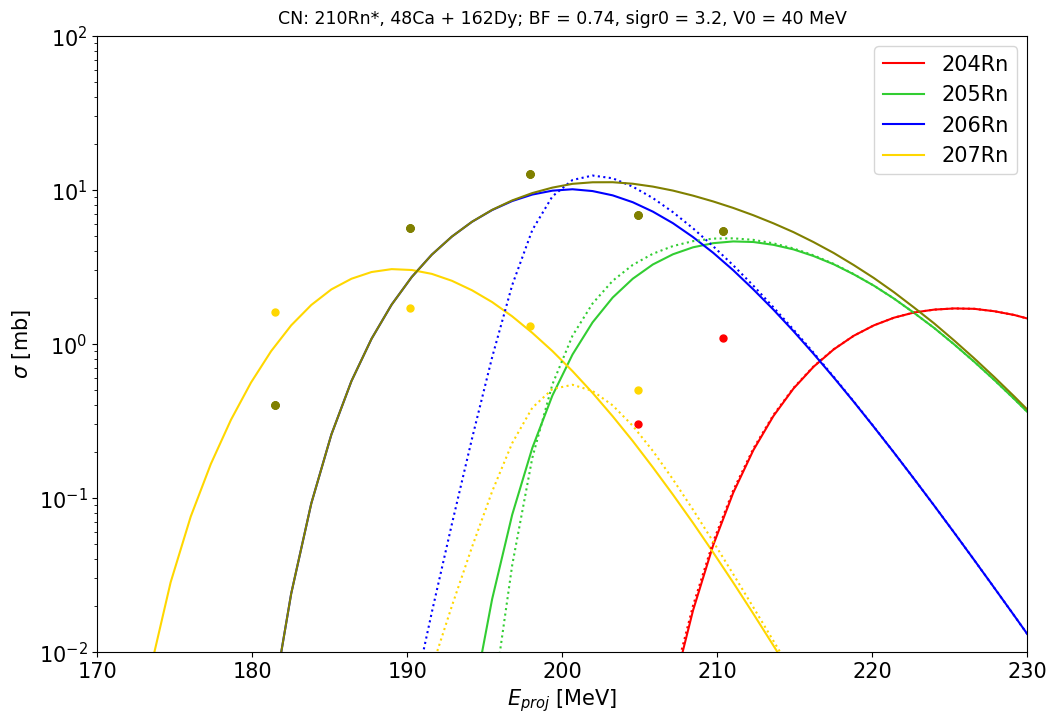

In [20]:
plt.rcParams.update({'font.size': 15})

colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']

# frame = 'E*/MeV'
frame = 'E_lab'
xmin = 170
xmax = 230
ymin = 1e-2
ymax = 1e2

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[5:9]))], palette=colors)
sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[5:9]))], palette=colors, ls=':', legend=False)

plt.plot(df10['E_lab'], (df10['205Rn']+df10['206Rn']), color='olive')

plt.semilogy()
plt.ylim(ymin, ymax)
if frame == 'E_lab':
    plt.xlabel('$E_{proj}$ [MeV]')
    plt.xlim(xmin, xmax)
elif frame == 'E*/MeV':
    plt.xlabel('$E*$ [MeV]')
    plt.xlim(xmin, xmax)
# plt.suptitle('CN: ' + cn + '*, ' + proj + ' + ' + trg + ' vs. ' + proj_ritu + ' + ' + trg_ritu)# + '; BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr))#, va='top')
# plt.title('BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr) + ', V0 = 40 MeV', va='bottom', fontsize='small')
plt.title('CN: ' + cn + '*, ' + proj + ' + ' + trg + '; BF = ' + str(bf) + ', sigr0 = ' + str(sigr) + ', V0 = 40 MeV', va='bottom', fontsize='small')
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
elif scale == pb:
    plt.ylabel('$\sigma$ [pb]')
plt.legend(loc='upper right')


try:
    for i in range(len(e_lab)):
        plt.scatter(e_lab, exp_data[i], marker='.',  color=colors[i], s=100)
        plt.scatter(e_lab, sum_4n5n, marker='.',  color='olive', s=100)
except:
    print('No exp data')
    
# exp_192at = 40*1e-6*scale
# exp_193at = 13*1e-6*scale
# exp_ritu = 300*1e-9*scale

# label_192at = '51V+144Sm->192At+3n SHIP'
# label_193at = '51V+144Sm->193At+2n SHIP'
# label_ritu = '54Fe+141Pr->191At+4n RITU'
# new_labels = [label_192at, label_193at, label_ritu]

# h, l = ax.get_legend_handles_labels()
# ax.legend(handles=h,labels=new_labels, loc='upper right')
        
# if frame == 'E*/MeV':
#     dfm_frame = 1
#     E_exp = 39
#     E_exp_ritu = 49
#     en_frame = 'Eexc'
# elif frame == 'E_lab':
#     dfm_frame = 0
#     E_exp = 230
#     E_exp_ritu = 260
#     en_frame = 'Elab'

# (_, caps_192at, _) = plt.errorbar(E_exp, exp_192at, yerr=exp_192at*0.25, marker='.', capsize=5, color=colors[0], ls='none', markersize=10)
# (_, caps_193at, _) = plt.errorbar(E_exp, exp_193at, yerr=exp_193at*0., marker='.', capsize=5, color=colors[1], ls='none', markersize=10)
# (_, caps_ritu, _) = plt.errorbar(E_exp_ritu, exp_ritu, yerr=0, marker='.', capsize=5, color=colors[2], ls='none', markersize=10)

# alpha_value = 0.1

# for i in range(plot_from, plot_from+2):
#     plt.fill_between(df10.iloc[:, dfm_frame],  df10.iloc[:, i], bf_low_10.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
#     plt.fill_between(df10.iloc[:, dfm_frame],  df10.iloc[:, i], bf_high_10.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
#     # plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_low_0.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
#     # plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_high_0.iloc[:, i], color=colors[i-plot_from], alpha = alpha_value)
    
# for i in range(plot_from_ritu, plot_from_ritu+1):
#     plt.fill_between(df10_ritu.iloc[:, dfm_frame],  df10_ritu.iloc[:, i], bf_low_10_ritu.iloc[:, i], color=colors[2], alpha = alpha_value)
#     plt.fill_between(df10_ritu.iloc[:, dfm_frame],  df10_ritu.iloc[:, i], bf_high_10_ritu.iloc[:, i], color=colors[2], alpha = alpha_value)
    
# for cap in caps_192at:
#     cap.set_markeredgewidth(1)
# for cap in caps_193at:
#     cap.set_markeredgewidth(1)
# for cap in caps_ritu:
#     cap.set_markeredgewidth(1)

plt.show()

# plt.savefig('195At_vs_RITU' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_' + en_frame + '.png')
# plt.savefig('195At_vs_RITU' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_' + en_frame + '.pdf')